# ALY6140 Final Project: Predict Boston Airbnb Price

Team member: Bo Li, Minyi Chen

# Introduction

Airbnb is popular among both hosts and guests. Hosts want to share their properties for more competitive price or competitive envriomment than hotels in the area. Guests also want to live in a more affordable and friendly way while they are traveling. It is important for us to know what factors can affect the price setting and how we can predict the price based on the selected features of the properties. 

Our project idea is from Boston Airbnb Open Data on Kaggle.com published two year ago. We also go to Inside Airbnb to get the updated original data. In this project, we first explore the original datasets provided online. Next, we explore the dataset with our selected features. Then, we clean the data and explore the data again to see the differennce. At the end, we build the price prediction models and see which model is best fit for the predictions.

References:
Boston Airbnb Open Data. https://www.kaggle.com/airbnb/boston/kernels
Airbnb Pricing Predictions. https://airbnb-pricing-prediction.herokuapp.com

# Data Source

The data we used is from Inside Airbnb:http://insideairbnb.com/get-the-data.html. We pick the Boston area because we are interested in knowing the Boston market. The data is newly updated to 2/9/2019. There are three dataset: review, calendar, and listing. We will focus on selected features in the listing dataset. 

The listing dataset includes more than 90 different features of each listing. Those features includes name, summary, space, description, bedroom, bathrooms, etc. We will only focus on selected features.

# Original datasets overview

1. Read csv datasets
2. Go over first 5 rows of each dataset
3. Check unique value of each columns

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df1 = pd.read_csv('calendar.csv')
df1.head() #prints the first 5 rows

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,225224,2019-02-09,t,$105.00,$105.00,1,365
1,225224,2019-02-10,t,$105.00,$105.00,1,365
2,225224,2019-02-11,t,$105.00,$105.00,1,365
3,225224,2019-02-12,t,$105.00,$105.00,1,365
4,225224,2019-02-13,t,$105.00,$105.00,1,365


In [5]:
# to see the unique value for each columns 
# for each column in my column names:
for c in list(df1.columns):
    
    # get a list of unique values
    n = df1[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

listing_id: 6155 unique values
date: 365 unique values
available
['t' 'f']
price: 2175 unique values
adjusted_price: 2167 unique values
minimum_nights: 51 unique values
maximum_nights: 142 unique values


In [6]:
df2 = pd.read_csv('listings.csv')
df2.head() #prints the first 5 rows

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.32
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.73
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.64
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.40


In [7]:
# to see the unique value for each columns 
# for each column in my column names:
for c in list(df2.columns):
    
    # get a list of unique values
    n = df2[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

id: 6155 unique values
listing_url: 6155 unique values
scrape_id
[20190209175027]
last_scraped
['2019-02-09']
name: 5902 unique values
summary: 4889 unique values
space: 3496 unique values
description: 5312 unique values
experiences_offered
['none']
neighborhood_overview: 2564 unique values
notes: 2236 unique values
transit: 2766 unique values
access: 2570 unique values
interaction: 2358 unique values
house_rules: 2643 unique values
thumbnail_url
[nan]
medium_url
[nan]
picture_url: 6000 unique values
xl_picture_url
[nan]
host_id: 2784 unique values
host_url: 2784 unique values
host_name: 1576 unique values
host_since: 1713 unique values
host_location: 237 unique values
host_about: 1597 unique values
host_response_time
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']
host_response_rate: 44 unique values
host_acceptance_rate
[nan]
host_is_superhost
['t' 'f' nan]
host_thumbnail_url: 2779 unique values
host_picture_url: 2779 unique values
host_neighbourhood:

In [8]:
df3 = pd.read_csv('reviews.csv')
df3.head() #prints the first 5 rows

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


# Data cleanup

1. Create new dataset with selected features and output label
2. Check missing value
3. Feature engineering
         1).  numberical features
         2).  categorical features
         3).  ordinal features


After review the three datasets, we decide to just use some variables in the listings.csv to predict the price. These variables are listed below. 

**Columns:** Total 17 columns, 16 properties, 1 target label price.


* host_is_superhost: whether the host is superhost (good host), t or f
* neighbourhood_cleansed: backbay, downtown, etc.
* property_type: 'Apartment' 'Guest suite' 'Condominium' 'Serviced apartment', etc.
* room_type: 'Entire home/apt' 'Private room' 'Shared room'
* accommodates: number of guests
* bathrooms: number of bathrooms
* bedrooms: number of bedrooms
* beds: number of beds
* price: price per night at 2/9/2019, "$"
* minimum_nights: minimum number of booking nights
* maximum_nights: maximum number of booking nights
* availability_365: number of availability hotels within 365 days
* availability_90: number of availability hotels within 90 days
* availability_60:number of availability hotels within 60 days
* availability_30:number of availability hotels within 30 days
* number_of_reviews: number of reviews
* cancellation_policy: six cancellation type 'super_strict_30' 'strict_14_with_grace_period' 'moderate' 'flexible'
 'super_strict_60' 'strict'

**Rows:** Records from 6155 Airbnb listing in Boston


In [9]:
# create new dataframe for certain variables
cols = [
'host_is_superhost',
'neighbourhood_cleansed',
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'price',
'minimum_nights',
'maximum_nights',
'availability_365',
'availability_90',
'availability_60',
'availability_30',
'number_of_reviews',
'cancellation_policy'   
]

df = pd.read_csv('listings.csv', usecols=cols)

In [10]:
df[list(df.columns)[:9]].head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price
0,t,East Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,$125.00
1,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,1.0,$145.00
2,t,Roxbury,Condominium,Entire home/apt,4,1.0,1.0,2.0,$169.00
3,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,$65.00
4,f,Downtown,Apartment,Entire home/apt,2,1.0,1.0,1.0,$99.00


In [11]:
df[list(df.columns)[9:]].head()

,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,cancellation_policy
0,30,1125,6,6,32,122,14,super_strict_30
1,3,730,23,47,73,341,80,strict_14_with_grace_period
2,3,730,0,6,26,250,85,strict_14_with_grace_period
3,3,60,17,47,77,99,75,moderate
4,30,365,0,0,0,254,22,strict_14_with_grace_period


In [12]:
# check unique values of each feature
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

host_is_superhost
['t' 'f' nan]
neighbourhood_cleansed
['East Boston' 'Roxbury' 'Roslindale' 'Downtown' 'South End' 'Back Bay'
 'Fenway' 'North End' 'Dorchester' 'West End' 'Jamaica Plain'
 'Charlestown' 'Beacon Hill' 'Mission Hill' 'Allston' 'South Boston'
 'Brighton' 'West Roxbury' 'Bay Village' 'South Boston Waterfront'
 'Longwood Medical Area' 'Chinatown' 'Mattapan' 'Hyde Park'
 'Leather District']
property_type
['Apartment' 'Guest suite' 'Condominium' 'Serviced apartment'
 'Bed and breakfast' 'Boat' 'House' 'Guesthouse' 'Townhouse' 'Loft'
 'Bungalow' 'Other' 'Villa' 'Boutique hotel' 'Resort' 'Hotel' 'Chalet'
 'Tiny house' 'Aparthotel' 'Barn' 'Camper/RV']
room_type
['Entire home/apt' 'Private room' 'Shared room']
accommodates
[ 2  4  3  6  7  1  5 12  9 10  8 11 15 14 13 16]
bathrooms
[1.  2.  1.5 nan 2.5 3.5 0.  3.  0.5 4.  4.5 6.  5. ]
bedrooms
[ 1. nan  2.  0.  3.  4.  5.  6.  7.  8.]
beds
[ 1.  2.  3.  5.  6.  4.  7.  8. 16.  9. 11. 12. 10. 13. nan 17. 19.]
price: 398 unique va

In [13]:
# check missing value
df.isnull().sum().sort_values(ascending = False)

bedrooms                  6
bathrooms                 5
beds                      3
host_is_superhost         2
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
cancellation_policy       0
number_of_reviews         0
minimum_nights            0
maximum_nights            0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
price                     0
dtype: int64

In [14]:
# replacing na values in host_is_superhost with f
df["host_is_superhost"].fillna("f", inplace = True) 

In [15]:
# replacing na values in bed with 0
df["beds"].fillna(0, inplace = True) 

In [16]:
# replacing na values in bathrooms with 0
df["bathrooms"].fillna(0, inplace = True) 

In [17]:
# replacing na values in bedroom with 0
df["bedrooms"].fillna(0, inplace = True) 

In [18]:
df.isnull().sum().sort_values(ascending = False)

cancellation_policy       0
beds                      0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
price                     0
number_of_reviews         0
minimum_nights            0
maximum_nights            0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
host_is_superhost         0
dtype: int64

After we replace the missing value, there is no more missing value in the columns.

# Data visualization

1. Histagram of each variable
2. bloxplot of each variable
3. correlation between each features with output label
4. barplot of number of listing at each locations

In [19]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(6155, 17)
Index(['host_is_superhost', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'cancellation_policy'],
      dtype='object')
host_is_superhost          object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                      object
minimum_nights              int64
maximum_nights              int64
availability_30             int64
availability_60             int64
availability_90             int64
availability_365            int64
number_of_reviews           int64
cancellation_policy        object
dtype: object


In [20]:
# Summarizing data
df.describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000
mean,3.407311,1.267019,1.349797,1.843704,5.307717,1.703041e+04,12.416897,27.448903,42.763444,141.981803,32.385053
std,2.175956,0.512186,0.927138,1.355644,17.816232,1.274625e+06,11.535227,22.836267,33.768567,128.051888,56.750744
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.070000e+02,0.000000,0.000000,0.000000,13.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,11.000000,29.000000,47.000000,102.000000,9.000000
75%,4.000000,1.500000,2.000000,2.000000,3.000000,1.125000e+03,24.000000,49.000000,74.000000,267.000000,38.000000
max,16.000000,6.000000,8.000000,19.000000,600.000000,1.000000e+08,30.000000,60.000000,90.000000,365.000000,626.000000


In [21]:
df['price'].describe()

count        6155
unique        398
top       $150.00
freq          226
Name: price, dtype: object

In [22]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [23]:
df.head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,cancellation_policy
0,t,East Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,125.0,30,1125,6,6,32,122,14,super_strict_30
1,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,1.0,145.0,3,730,23,47,73,341,80,strict_14_with_grace_period
2,t,Roxbury,Condominium,Entire home/apt,4,1.0,1.0,2.0,169.0,3,730,0,6,26,250,85,strict_14_with_grace_period
3,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,65.0,3,60,17,47,77,99,75,moderate
4,f,Downtown,Apartment,Entire home/apt,2,1.0,1.0,1.0,99.0,30,365,0,0,0,254,22,strict_14_with_grace_period


In [24]:
df['price'].describe()

count    6155.000000
mean      206.795126
std       375.423899
min         0.000000
25%        83.000000
50%       150.000000
75%       220.000000
max      5000.000000
Name: price, dtype: float64

In [42]:
df['host_is_superhost'].describe()

count     6155
unique       2
top          f
freq      4723
Name: host_is_superhost, dtype: object

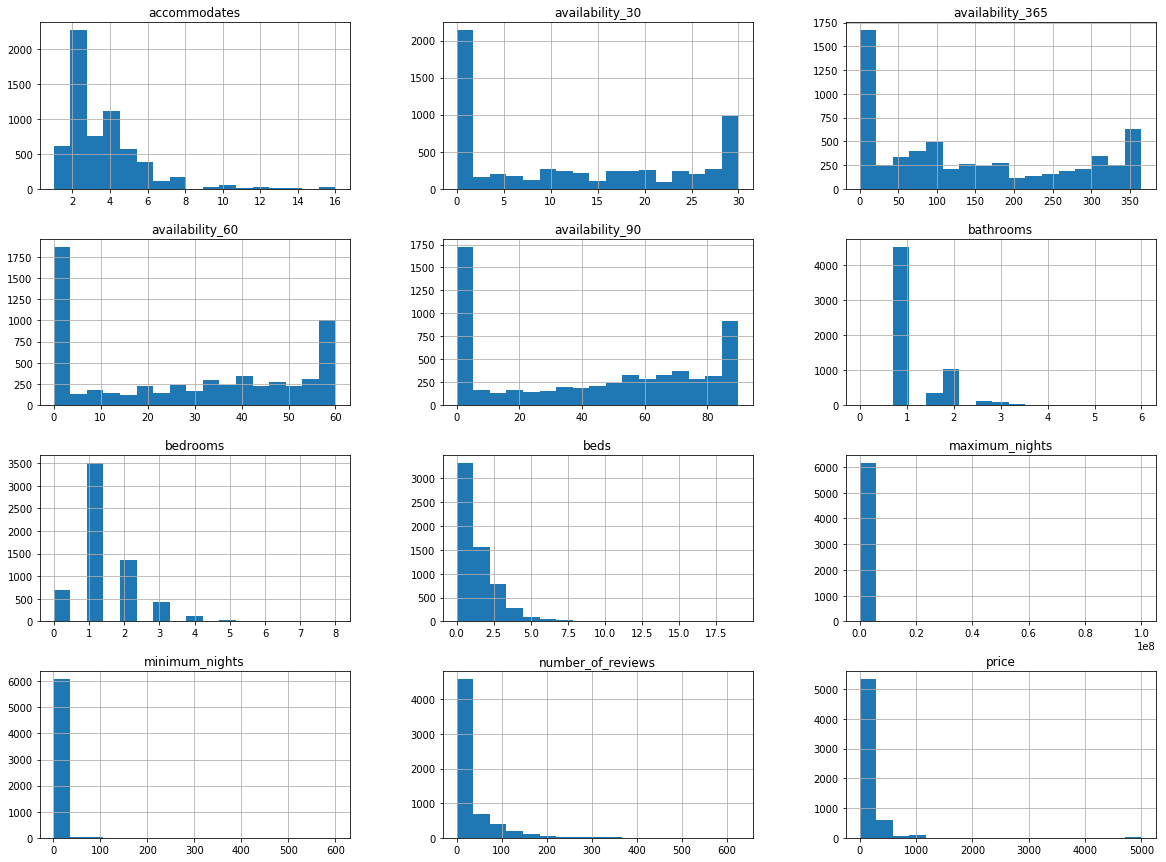

In [25]:
# histogram
df.hist(bins=17, figsize=(20, 15))
plt.show()

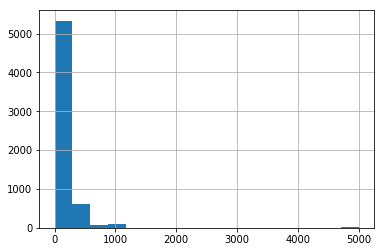

In [26]:
df["price"].hist(bins=17)
plt.show() 

In [27]:
### outlier problem!!!

In [28]:
# correlation
plt.figure(figsize=(10,10))
corr = df.corr()
corr.index = df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

ValueError: Length mismatch: Expected axis has 12 elements, new values have 17 elements

In [44]:
df.groupby('price').size()


price
0.0        3
10.0       5
15.0       1
17.0       1
18.0       8
19.0       1
20.0       1
21.0       1
22.0       1
24.0       3
25.0       9
26.0       4
27.0       2
28.0       6
29.0       9
30.0      28
31.0       7
32.0      12
33.0      12
34.0       6
35.0      50
36.0      31
37.0      11
38.0      10
39.0      21
40.0      67
41.0      10
42.0      10
43.0      10
44.0      24
          ..
689.0      1
695.0      2
699.0      2
700.0      5
719.0      1
750.0      3
769.0      1
777.0      1
780.0      1
793.0      1
799.0      2
800.0      5
829.0      1
840.0      1
850.0      1
875.0      2
900.0      5
950.0      2
975.0      2
995.0      1
999.0     39
1000.0    11
1050.0     1
1143.0    47
1300.0     1
1500.0     2
3000.0     2
3999.0     1
4800.0     1
5000.0    28
Length: 398, dtype: int64

In [30]:
#horizontal barplot
sns.barplot( y="beds")

ValueError: Could not interpret input 'beds'

In [31]:
from sklearn.preprocessing import LabelEncoder

lb_location = LabelEncoder()
df["location"] = lb_location.fit_transform(df["neighbourhood_cleansed"])
df[["neighbourhood_cleansed", "location"]].head(11)

,neighbourhood_cleansed,location
0,East Boston,9
1,Roxbury,19
2,Roxbury,19
3,Roslindale,18
4,Downtown,8
5,Downtown,8
6,South End,22
7,Back Bay,1
8,Downtown,8
9,Fenway,10


# Regression models

1. One-hot encoding categorical features
2. Seperate dataset into train and test
3. Build regression models
4. Evaluate model
5. Improve model

##### One-hot encoding
One-hot encoding means we will creat a new column for each unique value in that column. Normally, we will do this for our categorical features. For example, host_is_superhost has t and f. We will create two new columns, one is for t, and another one is for f. If the listing is t, it will be 1. If not, it will be 0. To create these one-hot encoding columns, we use the get_dummies function. We will use the prefix option, so that we know where the new columns come from.

In order to reduce the correlated columns, we would need to drop the first categorical value. This can be done by the drop_first option. Correlated columns problem means that we don't need all columns because we can figure out the last columns by looking at other columns. For example, we don't need both t and f columns. We can just keep one. If the listing is 0 then we know he is not superhost.

In [32]:
cols_cat = ['host_is_superhost',
'neighbourhood_cleansed',
'property_type',
'room_type',
'cancellation_policy'
]

In [33]:
# The get_dummies function does not work on numerical data. 
# To trick get_dummies, we can convert the numerical data into strings and then it will work properly.
#convert the numerical data into strings 
df[cols_cat] = df[cols_cat].astype('str')

In [34]:
# Use one-hot encoding technique, that is to use get_dummies function in python
# drop the first column to reduce the correlated columns
# We can do this at once for all three categorical features
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)

In [35]:
# show first 5 rows
df_cat.head()

,host_is_superhost_t,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,...,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# To add the one-hot encoding columns to the dataframe we can use concat function. 
# Make sure to use axis = 1 to indicate add the columns.
df = pd.concat([df,df_cat], axis = 1)

In [37]:
# Save the column names of the categorical data.
cols_all_cat = list(df_cat.columns)

In [38]:
cols_num = ["accommodates",
"bathrooms",
"bedrooms",
"beds",
"minimum_nights",
"maximum_nights",
"availability_365",
"availability_90",
"availability_60",
"availability_30",
"number_of_reviews"]

In [39]:
print('Total number of features:', len(cols_num + cols_all_cat ))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 63
Numerical Features: 11
Categorical Features: 52


In [40]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['price']]

In [41]:
df_data.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_365,availability_90,availability_60,availability_30,...,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price
0,2,1.0,1.0,1.0,30,1125,122,32,6,6,...,0,0,0,0,0,0,0,1,0,125.0
1,2,1.0,1.0,1.0,3,730,341,73,47,23,...,0,0,0,0,0,0,1,0,0,145.0
2,4,1.0,1.0,2.0,3,730,250,26,6,0,...,0,0,0,0,0,0,1,0,0,169.0
3,2,1.0,1.0,1.0,3,60,99,77,47,17,...,0,0,1,0,1,0,0,0,0,65.0
4,2,1.0,1.0,1.0,30,365,254,0,0,0,...,0,0,0,0,0,0,1,0,0,99.0


# Conclusion